In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import itertools
Scorecard = pd.read_csv("~\\Documents\\NYCDSA\\First Project\\Git_Workspace\\College_Scorecard_Data\\Data\\Trimmed_Scorecard.csv")
Scorecard

,UNITID,OPEID,OPEID6,INSTITUTION,CITY,STATE,ZIP,INSTITUTION AWARD,IS MAIN,NUMBRANCH,...,IRPS_HISP,IRPS_NHPI,IRPS_NRA,IRPS_UNKN,IRPS_WHITE,IRPS_WOMEN,IRPS_MEN,MD_EARN_WNE_4YR,CONTROL_PEPS,ADM_RATE_SUPP
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,3.0,1,1,...,0.0000,0.0000,0.0758,0.0095,0.1469,0.5024,0.4976,46562.0,Public,0.716
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,3.0,1,1,...,0.0319,0.0012,0.0569,0.0004,0.6808,0.4433,0.5567,52404.0,Public,0.8854
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,3.0,1,1,...,0.0000,0.0000,0.0000,0.0000,0.9706,0.1471,0.8529,45765.0,Private Nonprofit,NaN
3,100706,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,3.0,1,1,...,0.0256,0.0000,0.0484,0.0000,0.6809,0.4644,0.5356,67695.0,Public,0.7367
4,100724,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,3.0,1,1,...,0.0136,0.0000,0.0000,0.0090,0.2127,0.4796,0.5204,37551.0,Public,0.9799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6538,49576720,332918.0,3329.0,Pennsylvania State University-Penn State York,York,PA,17403-3326,NaN,0,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63258.0,Public,NaN
6539,49576721,332919.0,3329.0,Pennsylvania State University-Penn State Great...,Malvern,PA,19355-1488,NaN,0,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63258.0,Public,NaN
6540,49576722,332920.0,3329.0,Pennsylvania State University-Penn State Harri...,Middletown,PA,17057-4846,NaN,0,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63258.0,Public,NaN
6541,49576723,332921.0,3329.0,Pennsylvania State University-Penn State Brand...,Media,PA,19063-5522,NaN,0,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63258.0,Public,NaN


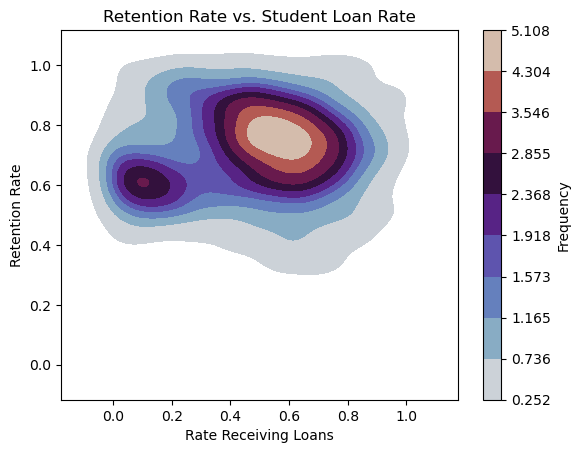

In [115]:
Scorecard_NA = Scorecard[Scorecard.PCTFLOAN != 0]
Scorecard_NA = Scorecard_NA.dropna(subset=['PCTFLOAN', "C150_4_POOLED"], inplace=False)
sns.kdeplot(x=Scorecard_NA.PCTFLOAN, y=Scorecard_NA.RET_FT4_POOLED, cmap="twilight", fill=True, 
            cbar=True, bw_adjust=1, cbar_kws={'label': 'Frequency'}).set(
    title="Retention Rate vs. Student Loan Rate", xlabel='Rate Receiving Loans', ylabel='Retention Rate')
plt.savefig('SLRHeat.png')

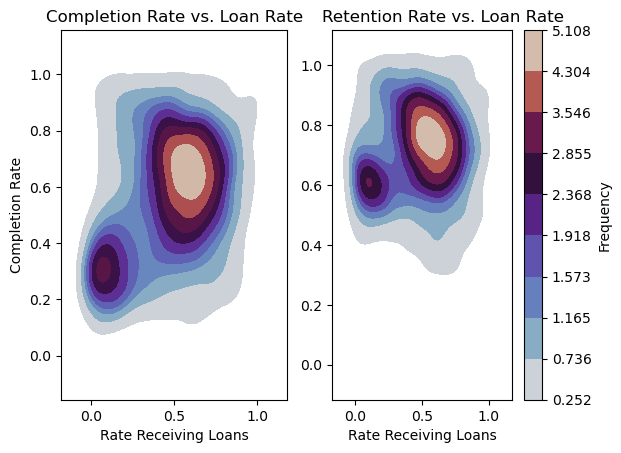

In [116]:
fig, axs = plt.subplots(ncols=2)
sns.kdeplot(x=Scorecard_NA.PCTFLOAN, y=Scorecard_NA.C150_4_POOLED, cmap="twilight", fill=True, bw_adjust=1, ax=axs[0]).set(
    title="Completion Rate vs. Loan Rate", xlabel='Rate Receiving Loans', ylabel='Completion Rate')
sns.kdeplot(x=Scorecard_NA.PCTFLOAN, y=Scorecard_NA.RET_FT4_POOLED, cmap="twilight", fill=True, 
            cbar=True, bw_adjust=1, cbar_kws={'label': 'Frequency'}, ax=axs[1]).set(
    title="        Retention Rate vs. Loan Rate", xlabel='Rate Receiving Loans', ylabel='')
plt.savefig('CRandRRLRHeat.png')

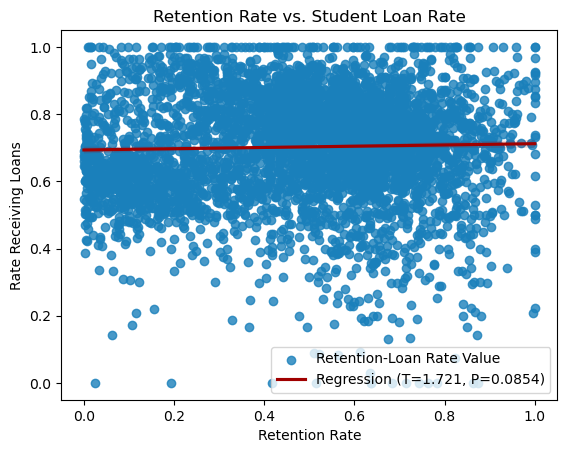

In [117]:
sns.regplot(x=Scorecard_NA["PCTFLOAN"], y=Scorecard_NA["RET_FT4_POOLED"], 
            scatter_kws={"color": "#1a80bb"}, line_kws={"color": "#a00000"}).set(
    title="Retention Rate vs. Student Loan Rate", xlabel='Retention Rate', ylabel='Rate Receiving Loans')
plt.legend(loc ="lower right", labels=["Retention-Loan Rate Value", "Regression (T=1.721, P=0.0854)"])
plt.savefig('StudentLoanRate.png')

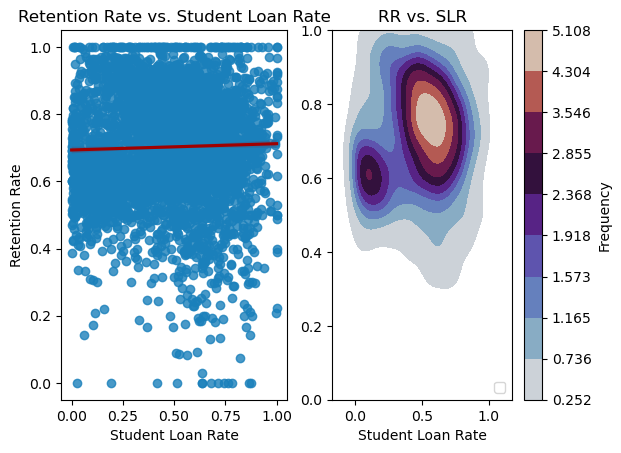

In [118]:
fig, axs = plt.subplots(ncols=2)
sns.regplot(x=Scorecard_NA["PCTFLOAN"], y=Scorecard_NA["RET_FT4_POOLED"],
            scatter_kws={"color": "#1a80bb"}, line_kws={"color": "#a00000"}, ax=axs[0]).set(
    title="Retention Rate vs. Student Loan Rate", xlabel='Student Loan Rate', ylabel='Retention Rate')
plt.legend(loc ="lower right", labels=["Retention-Part-Time Value","Regression"])
plt.ylim((0,1))
sns.kdeplot(x=Scorecard_NA.PCTFLOAN, y=Scorecard_NA.RET_FT4_POOLED, cmap="twilight", fill=True, 
            cbar=True, bw_adjust=1, cbar_kws={'label': 'Frequency'}, ax=axs[1]).set(
    title="RR vs. SLR", xlabel='Student Loan Rate', ylabel='')
plt.savefig('SLRandHeat.png')

(0.0, 1.0)

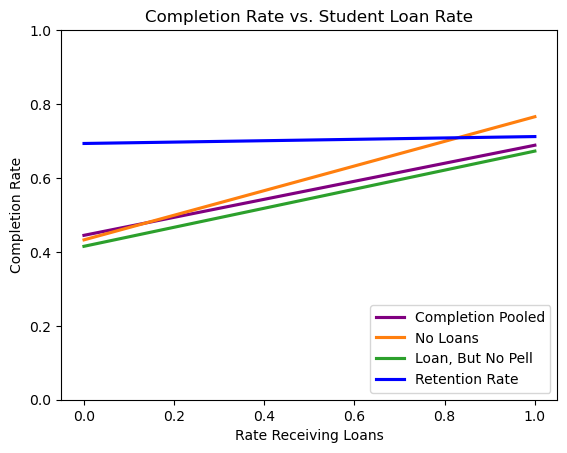

In [119]:
sns.regplot(x=Scorecard_NA["PCTFLOAN"], y=Scorecard_NA["C150_4_POOLED"], line_kws={"color": "purple"}, scatter=False, ci=None)
sns.regplot(x=Scorecard_NA["PCTFLOAN"], y=Scorecard_NA["C150_4_LOANNOPELL"], scatter=False, ci=None)
sns.regplot(x=Scorecard_NA["PCTFLOAN"], y=Scorecard_NA["C150_4_PELL"], scatter=False, ci=None)
sns.regplot(x=Scorecard_NA["PCTFLOAN"], y=Scorecard_NA["RET_FT4_POOLED"], line_kws={"color": "blue"}, scatter=False, ci=None).set(
    title="Completion Rate vs. Student Loan Rate", xlabel='Rate Receiving Loans', ylabel='Completion Rate')
plt.legend(loc ="lower right", labels=["Completion Pooled", "No Loans", "Loan, But No Pell", "Retention Rate"])
plt.ylim((0,1))

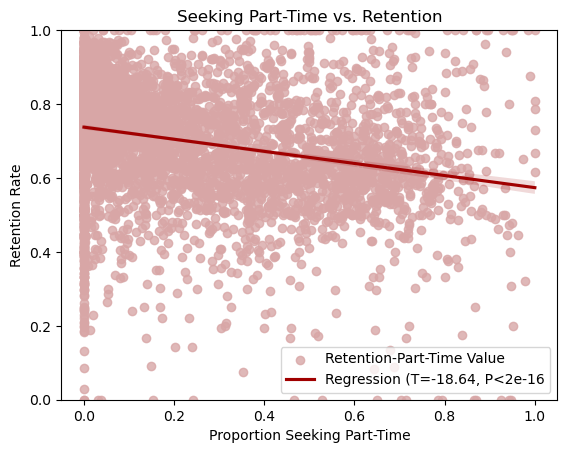

In [120]:
Scorecard_NA = Scorecard[Scorecard.PCTFLOAN != 0]
Scorecard_NA = Scorecard_NA.dropna(subset=['PCTFLOAN', "RET_FT4_POOLED"], inplace=False)
sns.regplot(x=Scorecard_NA["Proportion_seeking_part_time"], y=Scorecard_NA["RET_FT4_POOLED"],
            scatter_kws={"color": "#d8a6a6"}, line_kws={"color": "#a00000"}).set(
    title="Seeking Part-Time vs. Retention", xlabel='Proportion Seeking Part-Time', ylabel='Retention Rate')
plt.legend(loc ="lower right", labels=["Retention-Part-Time Value","Regression (T=-18.64, P<2e-16"])
plt.ylim((0,1))
plt.savefig('PartTime.png')

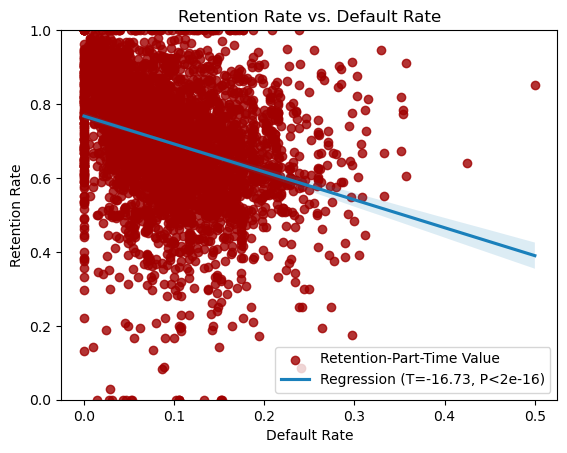

In [121]:
sns.regplot(x=Scorecard_NA["CDR2"], y=Scorecard_NA["RET_FT4_POOLED"],
            scatter_kws={"color": "#a00000"}, line_kws={"color": "#1a80bb"}).set(
    title="Retention Rate vs. Default Rate", xlabel='Default Rate', ylabel='Retention Rate')
plt.legend(loc ="lower right", labels=["Retention-Part-Time Value","Regression (T=-16.73, P<2e-16)"])
plt.ylim((0,1))
plt.savefig('DefaultRate.png')

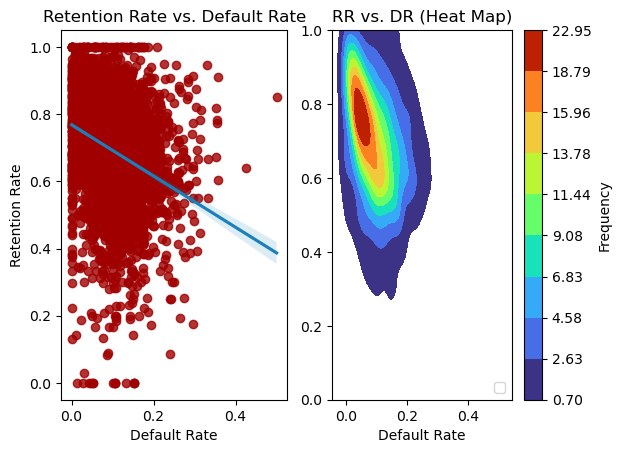

In [122]:
Scorecard_NA = Scorecard[Scorecard.PCTFLOAN != 0]
Scorecard_NA = Scorecard_NA.dropna(subset=['PCTFLOAN', "RET_FT4_POOLED"], inplace=False)
Scorecard_NA = Scorecard_NA[Scorecard_NA.AGEGE24 != 'PrivacySuppressed']
Scorecard_NA['AGEGE24'] = Scorecard_NA['AGEGE24'].astype(float)
fig1, axs = plt.subplots(ncols=2)
sns.regplot(x=Scorecard_NA["CDR2"], y=Scorecard_NA["RET_FT4_POOLED"],
            scatter_kws={"color": "#a00000"}, line_kws={"color": "#1a80bb"}, ax=axs[0]).set(
    title="Retention Rate vs. Default Rate", xlabel='Default Rate', ylabel='Retention Rate')
plt.legend(loc ="lower right", labels=["Retention-Part-Time Value","Regression"])
plt.ylim((0,1))
sns.kdeplot(x=Scorecard_NA.CDR2, y=Scorecard_NA.RET_FT4_POOLED, cmap="turbo", fill=True, 
            cbar=True, bw_adjust=1, cbar_kws={'label': 'Frequency'}, ax=axs[1]).set(
    title="RR vs. DR (Heat Map)", xlabel='Default Rate', ylabel='')
plt.savefig('DRandHeat.png')

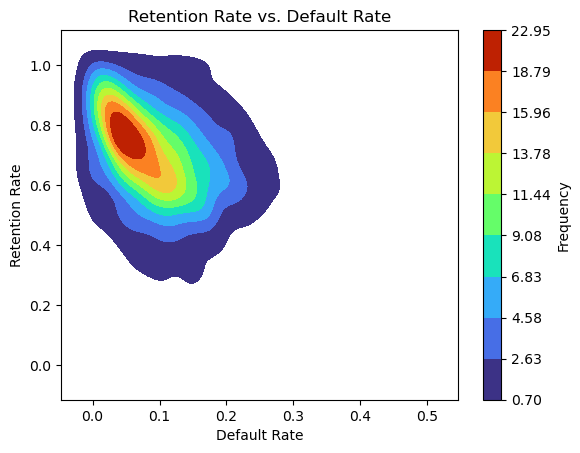

In [123]:
sns.kdeplot(x=Scorecard_NA.CDR2, y=Scorecard_NA.RET_FT4_POOLED, cmap="turbo", fill=True, 
            cbar=True, bw_adjust=1, cbar_kws={'label': 'Frequency'}).set(
    title="Retention Rate vs. Default Rate", xlabel='Default Rate', ylabel='Retention Rate')
plt.savefig('DefaultRateHeat.png')

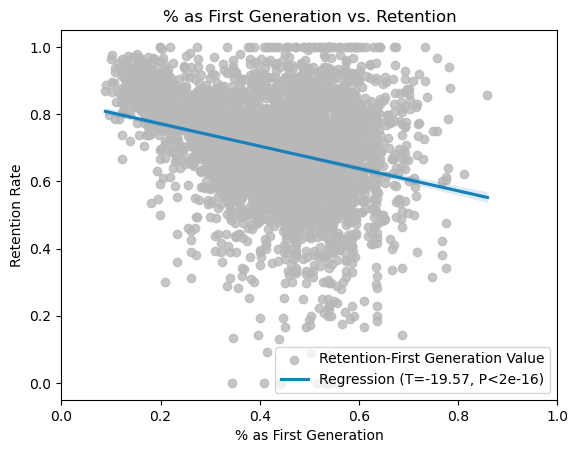

In [124]:
Scorecard_NA = Scorecard_NA[Scorecard_NA.FIRST_GEN != 'PrivacySuppressed']
Scorecard_NA['FIRST_GEN'] = Scorecard_NA['FIRST_GEN'].astype(float)
sns.regplot(x=Scorecard_NA["FIRST_GEN"], y=Scorecard_NA["RET_FT4_POOLED"],
            scatter_kws={"color": "#b8b8b8"}, line_kws={"color": "#1a80bb"}).set(
    title="% as First Generation vs. Retention", xlabel='% as First Generation', ylabel='Retention Rate')
plt.legend(loc ="lower right", labels=["Retention-First Generation Value","Regression (T=-19.57, P<2e-16)"])
plt.xlim((0,1))
plt.savefig('FirstGeneration.png')

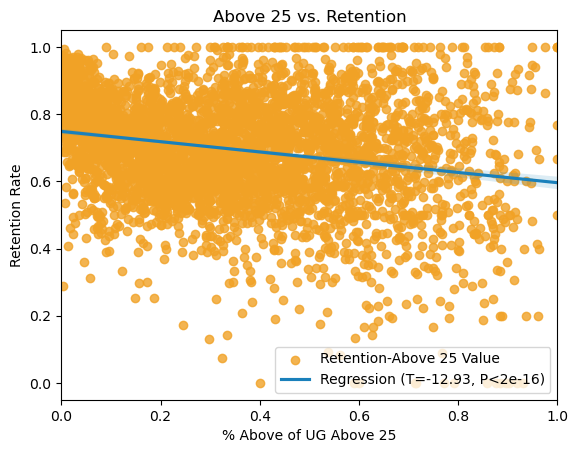

In [125]:
Scorecard_NA = Scorecard_NA[Scorecard_NA.UG25ABV != 'PrivacySuppressed']
Scorecard_NA['UG25ABV'] = Scorecard_NA['UG25ABV'].astype(float)
sns.regplot(x=Scorecard_NA["UG25ABV"], y=Scorecard_NA["RET_FT4_POOLED"],
            scatter_kws={"color": "#f1a226"}, line_kws={"color": "#1a80bb"}).set(
    title="Above 25 vs. Retention", xlabel='% Above of UG Above 25', ylabel='Retention Rate')
plt.legend(loc ="lower right", labels=["Retention-Above 25 Value","Regression (T=-12.93, P<2e-16)"])
plt.xlim((0,1))
plt.savefig('Above25.png')